In [1]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text

In [40]:
data = pd.read_pickle('pickled_data/data_first_clean.pkl')
data.drop(['President', 'Party','speech', 'first_clean_tokenized'], axis=1, inplace = True)
data = data.rename({'first_clean' : 'speech'}, axis=1)
#Significant years: 1946, end of ww2, 1976 end of Vietnam war, 1990 end of cold war, 2002 9/11, 2009 glob fin crisis
years = [1946, 1976, 1990, 2002, 2009]

data = data.loc[data['year'].isin(years)]
data = data.reset_index(drop=True)

data['year'] = data.year.astype('str')
data.head()

,year,speech
0,1946,a quarter century ago the congress decided tha...
1,1976,"mr. speaker, mr. vice president, members of th..."
2,1990,"tonight, i come not to speak about the ""state ..."
3,2002,we last met in an hour of shock and suffering....
4,2009,"madame speaker, mr. vice president, members of..."


In [41]:
speech_dict = dict(zip(data.year, data.speech))

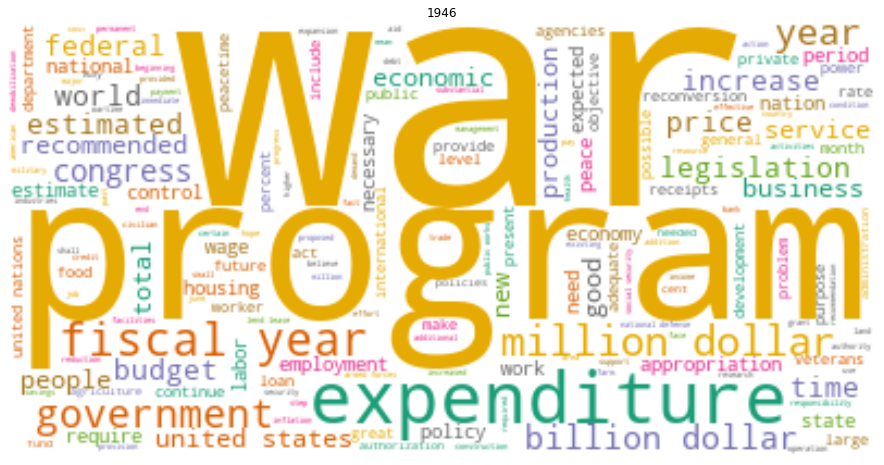

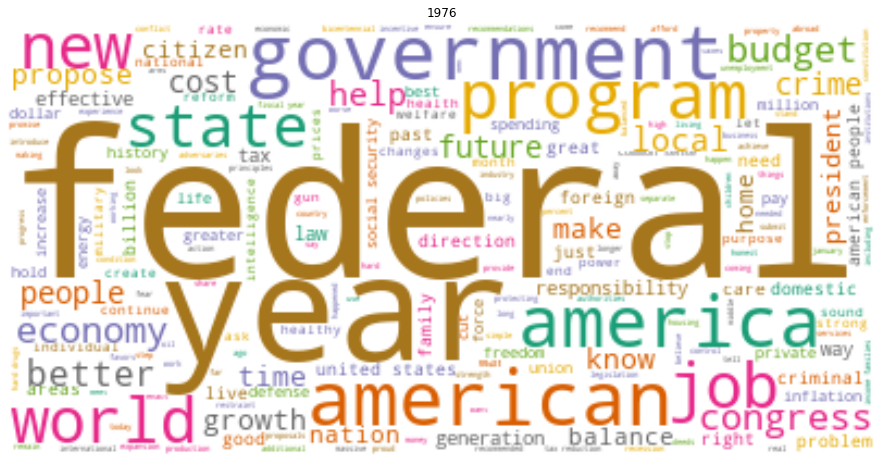

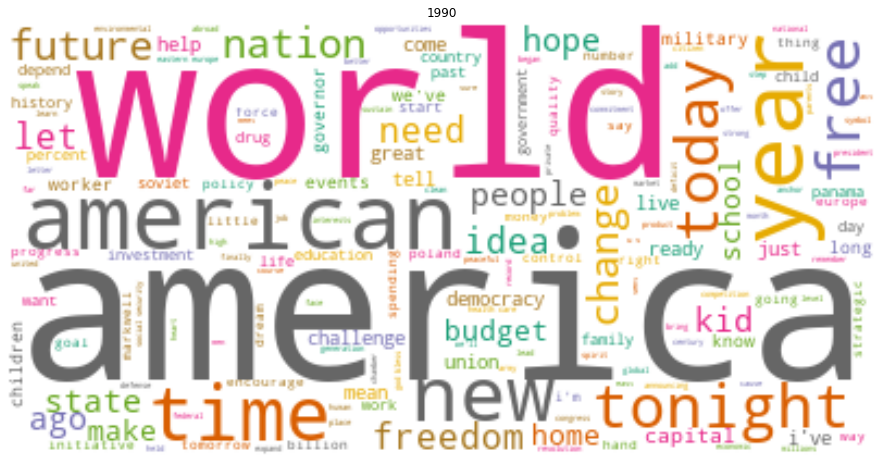

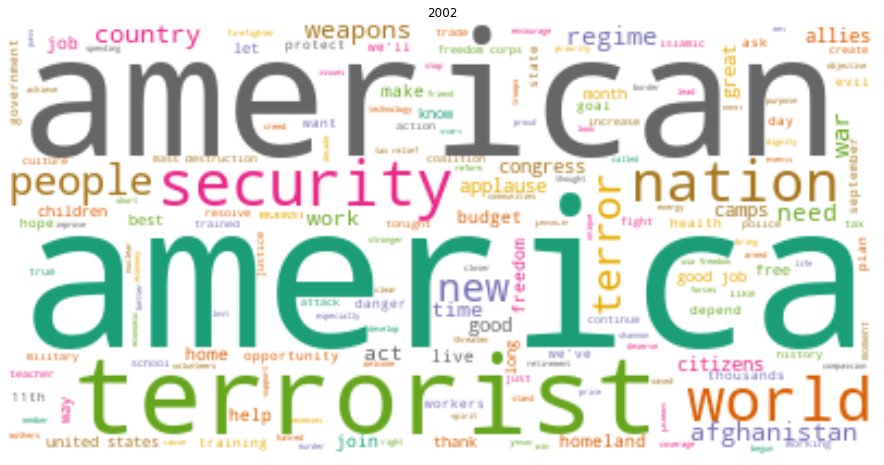

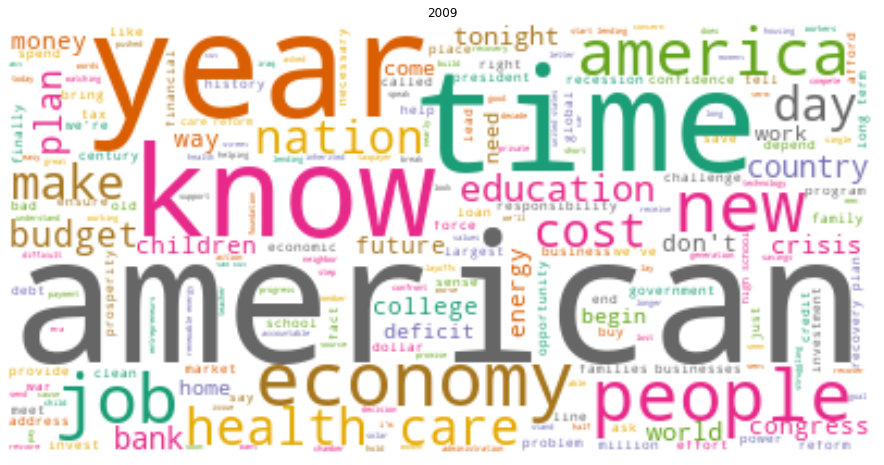

In [44]:
stop_words = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [10, 6]


for key, value in speech_dict.items():
    wc.generate(value)
    
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(key)    
    plt.show()